### Importing required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
train_path = r"G:/kaggle/mnist/train.csv"

In [5]:
df= pd.read_csv(train_path)

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# There are 784 pixels in each image ( 28x28=784) 

In [7]:
image = df.iloc[1].drop("label")
image

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 784, dtype: int64

In [8]:
image = np.array(image).reshape(28,28)

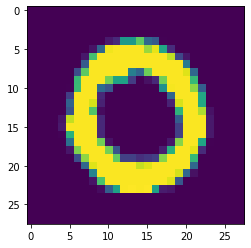

In [9]:
plt.imshow(image)

In [10]:
# Thats a zero, lets check it on label column if its showing a 0

print(df.iloc[1].label)

0


4


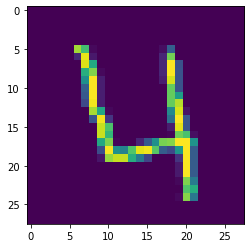

In [11]:
image = df.iloc[3].drop("label")
image = np.array(image).reshape(28,28)
plt.imshow(image)
print(df.iloc[3].label)

# So far so good

# To have a better accuracy we will do image augmentation by shifting left right up and down the data

In [12]:
right_shifted = pd.DataFrame(image).shift(2,axis=1,fill_value=0)

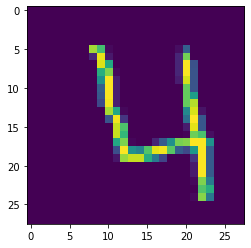

In [13]:
plt.imshow(right_shifted)

In [14]:
left_data = []
right_data=[]
up_data=[]
down_data=[]
same_data = [] 

In [15]:
len(df)

42000

In [16]:
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(-2,axis=1,fill_value=0)
    image = np.array(image).reshape(-1,1)
    left_data.append(image)

for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(2,axis=1,fill_value=0)
    image = np.array(image).reshape(-1,1)
    right_data.append(image)
    
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(-2,axis=0,fill_value=0)
    image = np.array(image).reshape(-1,1)
    up_data.append(image)
    
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(2,axis=0,fill_value=0)
    image = np.array(image).reshape(-1,1)
    down_data.append(image)
    
for row in range(0,len(df)):
    image=pd.DataFrame(np.array(df.iloc[row].drop("label")).reshape(28,28))
    image=image.shift(0,axis=0,fill_value=0)
    image = np.array(image).reshape(-1,1)
    same_data.append(image)

In [17]:
left_data =np.array(left_data).reshape(len(df),len(df.iloc[0].drop("label")))
left_data=pd.DataFrame(left_data)

right_data=np.array(right_data).reshape(len(df),len(df.iloc[0].drop("label")))
right_data=pd.DataFrame(right_data)

up_data=np.array(up_data).reshape(len(df),len(df.iloc[0].drop("label")))
up_data=pd.DataFrame(up_data)

down_data=np.array(down_data).reshape(len(df),len(df.iloc[0].drop("label")))
down_data=pd.DataFrame(down_data)

same_data = np.array(same_data).reshape(len(df),len(df.iloc[0].drop("label")))
same_data = pd.DataFrame(same_data)

In [18]:
left_data["label"] = df["label"]
right_data["label"] = df["label"]
up_data["label"] = df["label"]
down_data["label"] = df["label"]
same_data["label"]=df["label"]

In [19]:
left_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_frames = [same_data,left_data,right_data,up_data,down_data]

In [21]:
final_df = pd.concat(data_frames)

In [22]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
final_df.shape

(210000, 785)

#  Now our dataset size is 5x which will make training a bit slow but it will have better accuracy in test phase

In [24]:
x= final_df.drop(["label"],axis=1)
y=final_df["label"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2021)


In [40]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=20, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=None, verbose=3, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Here i have split the dataset into train and test but it is not necessary because in random forest classifier i will use out of bag evaluation, which works like cross validation score.

In [41]:
forest.fit(xtrain,ytrain)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.2s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.8s finished


RandomForestClassifier(max_depth=20, n_jobs=-1, oob_score=True, verbose=3)

In [42]:
forest.oob_score_

0.9560698412698413

# Now saving the model first and then submitting the results in kaggle

In [56]:
parameters = [ 
{
    'n_estimators':[30], 'criterion':['gini'], 'max_depth':[5], 'bootstrap':[True], 'oob_score':[True], 'n_jobs':[-1], 'random_state':[None], 'verbose':[3],
"min_samples_split":[2,4,6,8,10,12],"min_samples_leaf":[1,2,4,6,8,10,12],"max_leaf_nodes":[1,10,5]
}]



In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
randm_search =  RandomizedSearchCV(estimator=forest,param_distributions=parameters,n_iter=5,cv=3,scoring="accuracy")

In [58]:
randm_search.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    4.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.9s finished
G:\pythonnnn\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
G:\pythonnnn\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    4

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    5.0s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.3s finished
G:\pythonnnn\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
G:\pythonnnn\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed:  

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.4s finished
G:\pythonnnn\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
G:\pythonnnn\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=20, n_jobs=-1,
                                                    oob_score=True, verbose=3),
                   n_iter=5,
                   param_distributions=[{'bootstrap': [True],
                                         'criterion': ['gini'],
                                         'max_depth': [5],
                                         'max_leaf_nodes': [1, 10, 5],
                                         'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                              12],
                                         'min_samples_split': [2, 4, 6, 8, 10,
                                                               12],
                                         'n_estimators': [20], 'n_jobs': [-1],
                                         'oob_score': [True],
                                         'random_state': [None],
                                

In [59]:
randm_search.best_params_

{'verbose': 3,
 'random_state': None,
 'oob_score': True,
 'n_jobs': -1,
 'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 10,
 'max_depth': 5,
 'criterion': 'gini',
 'bootstrap': True}

In [64]:
forest = RandomForestClassifier(n_estimators=1000,  criterion='gini', max_depth=50, min_samples_split=8, min_samples_leaf=2,  max_leaf_nodes=10, bootstrap=True, oob_score=False, n_jobs=-1, random_state=2021, verbose=3, )

In [65]:
forest.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000building tree 8 of 1000

building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000building tree 15 of 1000
building tree 16 of 1000

building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000building tree 21 of 1000

building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s


building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000building tree 29 of 1000

building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000building tree 58 of 1000

building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.0s


building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000building tree 141 of 1000

building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000building tree 148 of 1000

building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tree 158 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   34.9s


building tree 280 of 1000
building tree 281 of 1000
building tree 282 of 1000
building tree 283 of 1000
building tree 284 of 1000
building tree 285 of 1000
building tree 286 of 1000
building tree 287 of 1000
building tree 288 of 1000
building tree 289 of 1000
building tree 290 of 1000
building tree 291 of 1000
building tree 292 of 1000
building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000
building tree 317 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.1min


building tree 504 of 1000
building tree 505 of 1000
building tree 506 of 1000
building tree 507 of 1000
building tree 508 of 1000
building tree 509 of 1000
building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000
building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000
building tree 516 of 1000
building tree 517 of 1000
building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000
building tree 521 of 1000
building tree 522 of 1000
building tree 523 of 1000
building tree 524 of 1000
building tree 525 of 1000
building tree 526 of 1000
building tree 527 of 1000
building tree 528 of 1000
building tree 529 of 1000
building tree 530 of 1000
building tree 531 of 1000
building tree 532 of 1000
building tree 533 of 1000
building tree 534 of 1000
building tree 535 of 1000
building tree 536 of 1000
building tree 537 of 1000
building tree 538 of 1000
building tree 539 of 1000
building tree 540 of 1000
building tree 541 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min


building tree 792 of 1000
building tree 793 of 1000
building tree 794 of 1000
building tree 795 of 1000
building tree 796 of 1000
building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000
building tree 800 of 1000
building tree 801 of 1000
building tree 802 of 1000
building tree 803 of 1000
building tree 804 of 1000
building tree 805 of 1000
building tree 806 of 1000
building tree 807 of 1000
building tree 808 of 1000
building tree 809 of 1000
building tree 810 of 1000
building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000
building tree 814 of 1000
building tree 815 of 1000
building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000
building tree 819 of 1000
building tree 820 of 1000
building tree 821 of 1000
building tree 822 of 1000
building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tree 826 of 1000
building tree 827 of 1000
building tree 828 of 1000
building tree 829 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


RandomForestClassifier(max_depth=50, max_leaf_nodes=10, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=2021, verbose=3)

In [66]:
forest.oob_score_

0.6026412698412699

#  oob score is very less when used randomized search parameters because the n_estimators and max_depth used in randomized search cv are not the best.  Also it takes more time for randomized search cv because we have increased the size of data to 5x.  Hence we will not use the parameters achieved from hyperparameter tuning.

# Now creating final model 

In [67]:
forest = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=50, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=-1, random_state=2021, verbose=3, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [68]:
forest.fit(x,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000building tree 8 of 1000

building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000building tree 18 of 1000

building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.8s


building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min


building tree 121 of 1000
building tree 122 of 1000
building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tree 158 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.2min


building tree 280 of 1000
building tree 281 of 1000
building tree 282 of 1000
building tree 283 of 1000
building tree 284 of 1000building tree 285 of 1000

building tree 286 of 1000
building tree 287 of 1000
building tree 288 of 1000
building tree 289 of 1000
building tree 290 of 1000
building tree 291 of 1000
building tree 292 of 1000
building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000
building tree 317 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  8.0min


building tree 504 of 1000
building tree 505 of 1000
building tree 506 of 1000
building tree 507 of 1000
building tree 508 of 1000
building tree 509 of 1000
building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000
building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000
building tree 516 of 1000
building tree 517 of 1000
building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000
building tree 521 of 1000
building tree 522 of 1000
building tree 523 of 1000
building tree 524 of 1000
building tree 525 of 1000
building tree 526 of 1000
building tree 527 of 1000
building tree 528 of 1000
building tree 529 of 1000
building tree 530 of 1000
building tree 531 of 1000
building tree 532 of 1000
building tree 533 of 1000
building tree 534 of 1000
building tree 535 of 1000
building tree 536 of 1000
building tree 537 of 1000
building tree 538 of 1000
building tree 539 of 1000
building tree 540 of 1000
building tree 541 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 11.5min


building tree 793 of 1000
building tree 794 of 1000
building tree 795 of 1000
building tree 796 of 1000
building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000
building tree 800 of 1000
building tree 801 of 1000
building tree 802 of 1000
building tree 803 of 1000
building tree 804 of 1000
building tree 805 of 1000
building tree 806 of 1000
building tree 807 of 1000
building tree 808 of 1000
building tree 809 of 1000
building tree 810 of 1000
building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000
building tree 814 of 1000
building tree 815 of 1000
building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000
building tree 819 of 1000
building tree 820 of 1000
building tree 821 of 1000
building tree 822 of 1000
building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tree 826 of 1000
building tree 827 of 1000
building tree 828 of 1000
building tree 829 of 1000
building tree 830 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 14.4min finished


RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=2021, verbose=3)

In [71]:
forest.oob_score_

0.9693333333333334

# The model is not saved because the size of model is big which takes much time for saving the model

In [72]:
test_path = r'G:\kaggle\mnist\test.csv'

In [77]:
test_df  = pd.read_csv(test_path)
test_df.columns= same_data.columns.drop("label")

In [78]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
result = forest.predict(test_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    8.2s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:   16.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   37.8s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   45.0s finished


In [81]:
submission_path = r'G:/kaggle/mnist/Submission.csv'

In [86]:
submission = pd.read_csv(submission_path)

In [87]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [88]:
submission["Label"] = result

In [89]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [91]:
submission.to_csv(r'G:\kaggle\mnist\submission.csv',index=None)

# After uploading it to kaggle competition it got score of 97.37% and rank of 4533.  Not bad :)